# Heart Disease Prediction

This is a model which predicts the presence of a heart disease by using a number of features such as Sex, Age, Current Smoker, Cigs Per Day, BP Meds(which tells if the patient was using any BP medications), Prevalent Stroke, Diabetes, Tot Chol,Sys BP, Dia BP, BMI(Body Mass Index), Heart Rate and Ten Year CHD.

The dataset was downloaded from Kaggle.

Here, in this dataset, our target variable or the predictant is the Ten Year CHD which will tell us based on the independant variables if that person has a risk of having a Coronary Heart Disease. Here, 0 means No and 1 means Yes.


In [1]:
#importing libraries for data visualization and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.rename(columns = {'male':'gender'},inplace=True)

In [6]:
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
df.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df['TenYearCHD'].value_counts()/len(df)*100

0    84.804153
1    15.195847
Name: TenYearCHD, dtype: float64

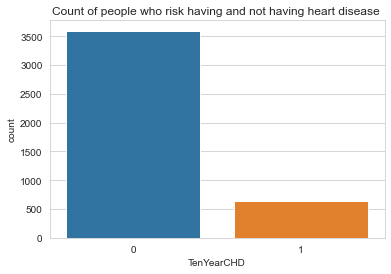

In [151]:
sns.countplot(x='TenYearCHD',data=df)
plt.title('Count of people who risk having and not having heart disease ');

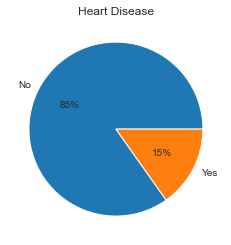

In [152]:
labels = ['No', 'Yes']
values = df['TenYearCHD'].value_counts()

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease');

###### Note :

- The data is highly imbalanced as there are 85% of people without the heart disease and hence we will have to balance it which will be done in the later stages.

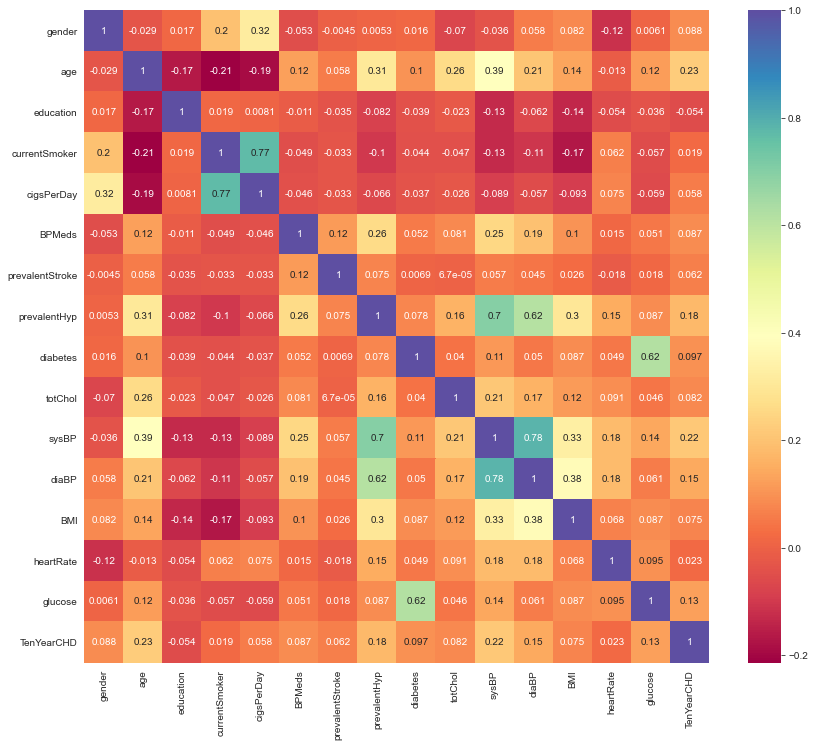

In [78]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True, cmap = 'Spectral');

- We can see that features such as age, prevelantHyp(Hypertension), sysBP(Systolic BP), diaBP(Diastolic) and glucose have a    good correlation.

- There is a high correlation between the glucose level and the person being diabetic.

- Similarly there is correlation between sysBP and prevalentHyp.

### Exploring Age

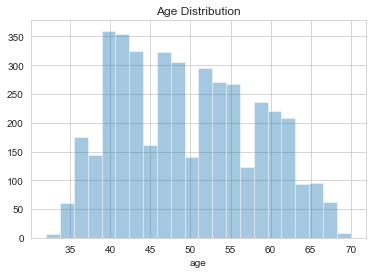

In [27]:
sns.distplot(df['age'],kde=False)
plt.title('Age Distribution');

In [29]:
print('Minimum age :', df['age'].min())
print('Maximum age :', df['age'].max())
print('Average age :', df['age'].min())

Minimum age : 32
Maximum age : 70
Average age : 32


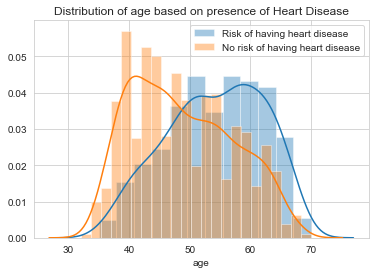

In [34]:
sns.distplot(df[df['TenYearCHD'] == 1]['age'], label = 'Risk of having heart disease')
sns.distplot(df[df['TenYearCHD'] == 0]['age'], label = 'No risk of having heart disease')
plt.title('Distribution of age based on presence of Heart Disease')
plt.legend();

In [36]:
print('Minimum age of people who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['age'].min())
print('Maximum age of people who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['age'].max())
print('Average age of people who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['age'].mean())

Minimum age of people who do not risk having a heart disease : 32
Maximum age of people who do not risk having a heart disease : 70
Average age of people who do not risk having a heart disease : 48.76766833611575


In [37]:
print('Minimum age of people who risk having a heart disease :', df[df['TenYearCHD'] == 1]['age'].min())
print('Maximum age of people who risk having a heart disease :', df[df['TenYearCHD'] == 1]['age'].max())
print('Average age of people who risk having a heart disease :', df[df['TenYearCHD'] == 1]['age'].mean())

Minimum age of people who risk having a heart disease : 35
Maximum age of people who risk having a heart disease : 70
Average age of people who risk having a heart disease : 54.14596273291925


- From the observation, we can see that heart disease affects both young and old people but the probability of having a heart disease is more in old people.

### Exploring Gender

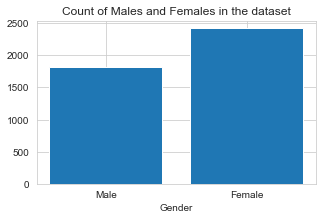

In [38]:
M = df[df['gender'] == 1].count()['TenYearCHD']
F = df[df['gender'] == 0].count()['TenYearCHD']

figure, ax = plt.subplots(figsize=(5,3))
ax.bar(x = ['Male', 'Female'], height = [M,F])
plt.xlabel('Gender')
plt.title('Count of Males and Females in the dataset');

### Exploring Current Smoker

In [39]:
smoke = df[(df['currentSmoker'] == 1) & (df['TenYearCHD']==1)]

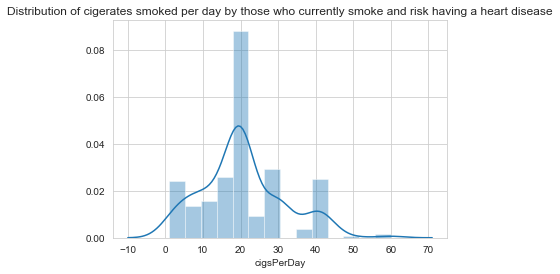

In [48]:
sns.distplot(smoke[smoke['TenYearCHD']==1]['cigsPerDay'])
plt.title('Distribution of cigerates smoked per day by those who currently smoke and risk having a heart disease');

In [46]:
print('Minimum cigerates smoked per day by those who risk having a heart disease :', smoke[smoke['TenYearCHD'] == 1]['cigsPerDay'].min())
print('Maximum cigerates smoked per day by those who risk having a heart disease :', smoke[smoke['TenYearCHD'] == 1]['cigsPerDay'].max())
print('Average cigerates smoked per day by those who risk having a heart disease :', smoke[smoke['TenYearCHD'] == 1]['cigsPerDay'].mean())

Minimum cigerates smoked per day by those who risk having a heart disease : 1.0
Maximum cigerates smoked per day by those who risk having a heart disease : 60.0
Average cigerates smoked per day by those who risk having a heart disease : 20.61631419939577


- We can see that there are people who smoke **1** cigerate per day and have a heart disease and also some of them who have **60** in a day. But the avearge cigerates smoked in a day by someone who risks having a heart disease is around **20** which is on the higher side.


### Exploring Systolic Blood Pressure (sysBP)

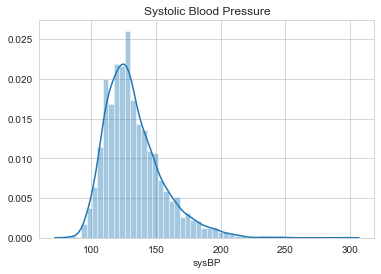

In [54]:
sns.distplot(df['sysBP'])
plt.title('Systolic Blood Pressure');

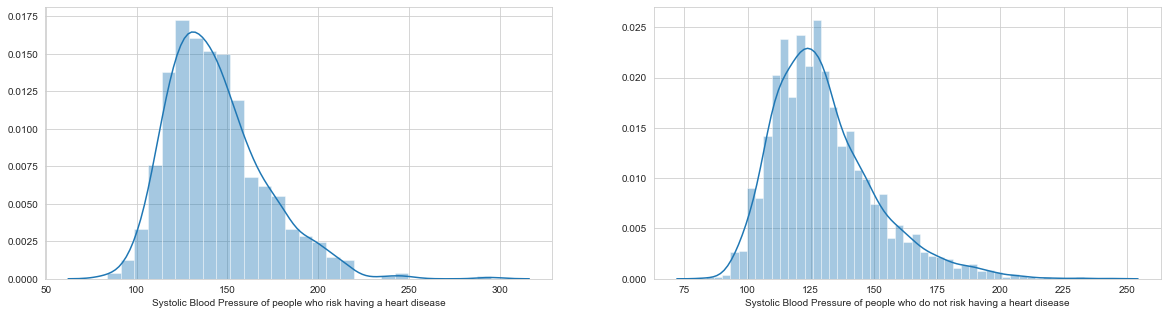

In [55]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,5))
ax = sns.distplot(df[df['TenYearCHD']==1]['sysBP'], ax=axis1)
ax.set(xlabel='Systolic Blood Pressure of people who risk having a heart disease')
ax = sns.distplot(df[df['TenYearCHD']==0]['sysBP'], ax=axis2)
ax.set(xlabel='Systolic Blood Pressure of people who do not risk having a heart disease');

In [58]:
print('Minimum Systolic Blood Pressure of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['sysBP'].min())
print('Maximum Systolic Blood Pressure of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['sysBP'].max())
print('Average Systolic Blood Pressure of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['sysBP'].mean())

Minimum Systolic Blood Pressure of those who risk having a heart disease : 83.5
Maximum Systolic Blood Pressure of those who risk having a heart disease : 295.0
Average Systolic Blood Pressure of those who risk having a heart disease : 143.6187888198758


In [59]:
print('Minimum Systolic Blood Pressure of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['sysBP'].min())
print('Maximum Systolic Blood Pressure of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['sysBP'].max())
print('Average Systolic Blood Pressure of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['sysBP'].mean())

Minimum Systolic Blood Pressure of those who do not risk having a heart disease : 83.5
Maximum Systolic Blood Pressure of those who do not risk having a heart disease : 243.0
Average Systolic Blood Pressure of those who do not risk having a heart disease : 130.33361157484697


### Exploring Diastolic Blood Pressure (diaBP)

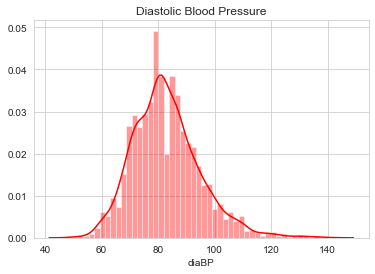

In [61]:
sns.distplot(df['diaBP'], color = 'red')
plt.title('Diastolic Blood Pressure');

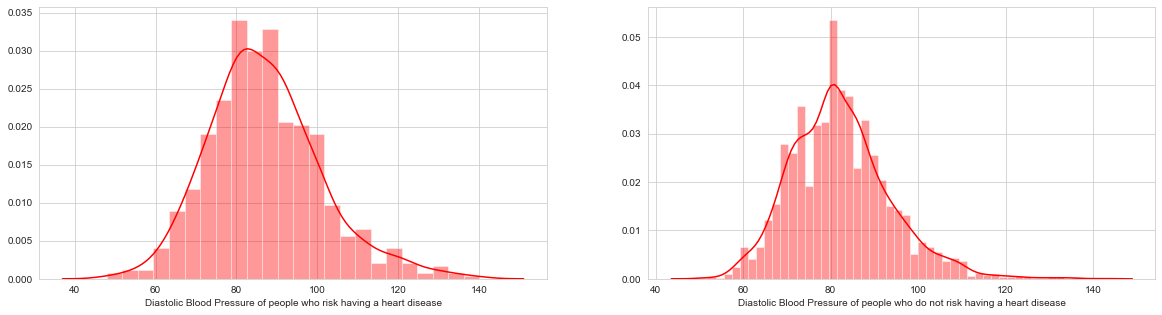

In [64]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,5))
ax = sns.distplot(df[df['TenYearCHD']==1]['diaBP'], ax=axis1, color = 'red')
ax.set(xlabel='Diastolic Blood Pressure of people who risk having a heart disease')
ax = sns.distplot(df[df['TenYearCHD']==0]['diaBP'], ax=axis2, color = 'red')
ax.set(xlabel='Diastolic Blood Pressure of people who do not risk having a heart disease');

In [65]:
print('Minimum Diastolic Blood Pressure of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['diaBP'].min())
print('Maximum Diastolic Blood Pressure of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['diaBP'].max())
print('Average Diastolic Blood Pressure of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['diaBP'].mean())

Minimum Diastolic Blood Pressure of those who risk having a heart disease : 48.0
Maximum Diastolic Blood Pressure of those who risk having a heart disease : 140.0
Average Diastolic Blood Pressure of those who risk having a heart disease : 86.98136645962732


In [66]:
print('Minimum Diastolic Blood Pressure of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['diaBP'].min())
print('Maximum Diastolic Blood Pressure of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['diaBP'].max())
print('Average Diastolic Blood Pressure of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['diaBP'].mean())

Minimum Diastolic Blood Pressure of those who do not risk having a heart disease : 50.0
Maximum Diastolic Blood Pressure of those who do not risk having a heart disease : 142.5
Average Diastolic Blood Pressure of those who do not risk having a heart disease : 82.16096271563717


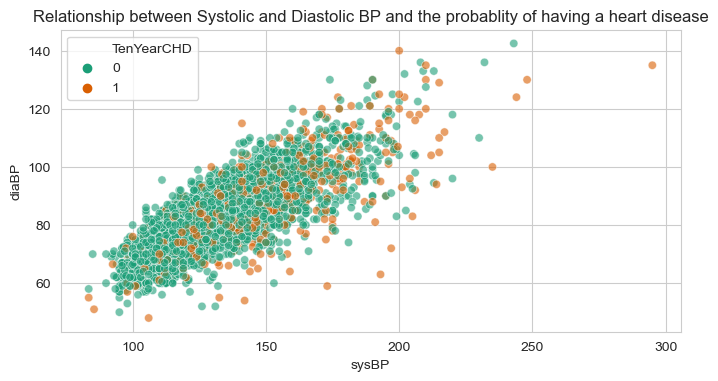

In [113]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(data=df,x='sysBP',y='diaBP',hue='TenYearCHD', linewidth=0.5,alpha=0.6, palette='Dark2');
plt.title('Relationship between Systolic and Diastolic BP and the probablity of having a heart disease');

### Exploring Cholestrol (totChol)

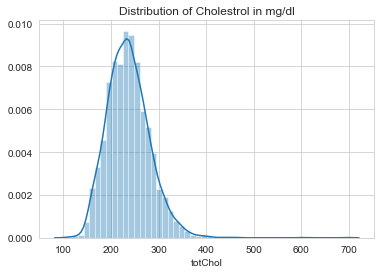

In [67]:
sns.distplot(df['totChol'])
plt.title('Distribution of Cholestrol in mg/dl');

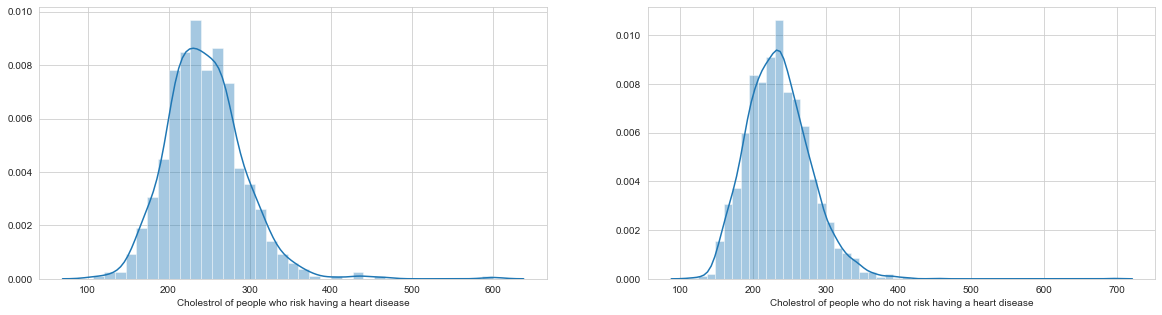

In [68]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,5))
ax = sns.distplot(df[df['TenYearCHD']==1]['totChol'], ax=axis1)
ax.set(xlabel='Cholestrol of people who risk having a heart disease')
ax = sns.distplot(df[df['TenYearCHD']==0]['totChol'], ax=axis2)
ax.set(xlabel='Cholestrol of people who do not risk having a heart disease');

In [69]:
print('Minimum Cholestrol of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['totChol'].min())
print('Maximum Cholestrol of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['totChol'].max())
print('Average Cholestrol of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['totChol'].mean())

Minimum Cholestrol of those who risk having a heart disease : 107.0
Maximum Cholestrol of those who risk having a heart disease : 600.0
Average Cholestrol of those who risk having a heart disease : 245.38897637795276


In [72]:
print('Minimum Cholestrol of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['totChol'].min())
print('Maximum Cholestrol of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['totChol'].max())
print('Average Cholestrol of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['totChol'].mean())

Minimum Cholestrol of those who do not risk having a heart disease : 113.0
Maximum Cholestrol of those who do not risk having a heart disease : 696.0
Average Cholestrol of those who do not risk having a heart disease : 235.17253025612158


### Exploring Body Mass Index (BMI)

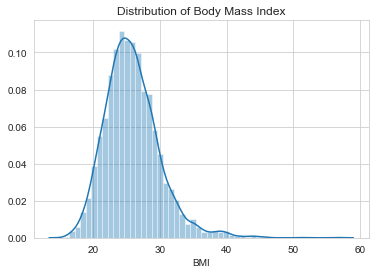

In [122]:
sns.distplot(df['BMI'])
plt.title('Distribution of Body Mass Index');

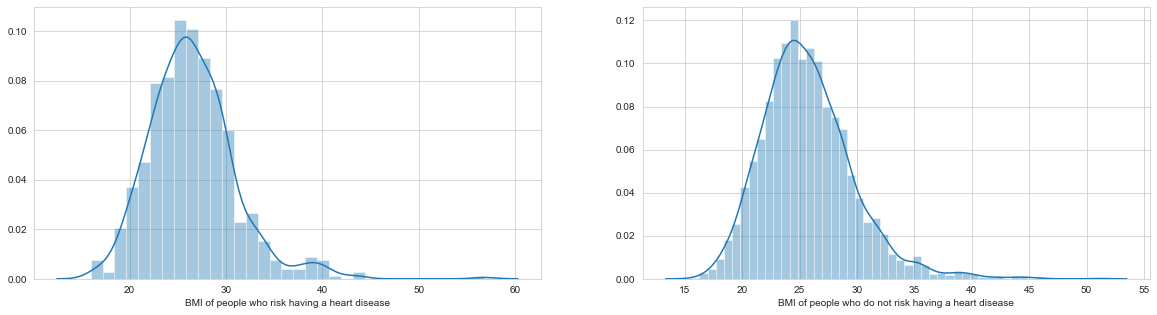

In [124]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,5))
ax = sns.distplot(df[df['TenYearCHD']==1]['BMI'], ax=axis1)
ax.set(xlabel='BMI of people who risk having a heart disease')
ax = sns.distplot(df[df['TenYearCHD']==0]['BMI'], ax=axis2)
ax.set(xlabel='BMI of people who do not risk having a heart disease');

In [125]:
print('Minimum BMI of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['BMI'].min())
print('Maximum BMI of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['BMI'].max())
print('Average BMI of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['BMI'].mean())

Minimum BMI of those who risk having a heart disease : 15.96
Maximum BMI of those who risk having a heart disease : 56.8
Average BMI of those who risk having a heart disease : 26.53145110410095


In [126]:
print('Minimum BMI of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['BMI'].min())
print('Maximum BMI of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['BMI'].max())
print('Average BMI of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['BMI'].mean())

Minimum BMI of those who do not risk having a heart disease : 15.54
Maximum BMI of those who do not risk having a heart disease : 51.28
Average BMI of those who do not risk having a heart disease : 25.67300697350065


In [146]:
#Categorizing BMI based on the medical information available from the internet

def bmi_cat(BMI):
    
    if BMI < 18.5:
        return 'Underweight'
    elif BMI >= 18.5 and BMI<= 24.9:
        return 'Normal'
    elif BMI >= 25 and BMI<= 29.9:
        return 'Overweight'
    elif BMI >=30 and BMI <= 34.9:
        return 'Obese'
    else:
        return 'Extremely Obese'

In [147]:
df['BMI_cat'] = df['BMI'].apply(bmi_cat)

In [149]:
df.head(10)[['BMI','BMI_cat']]

,BMI,BMI_cat
0,26.97,Overweight
1,28.73,Overweight
2,25.34,Overweight
3,28.58,Overweight
4,23.10,Normal
5,30.30,Obese
6,33.11,Obese
7,21.68,Normal
8,26.36,Overweight
9,23.61,Normal


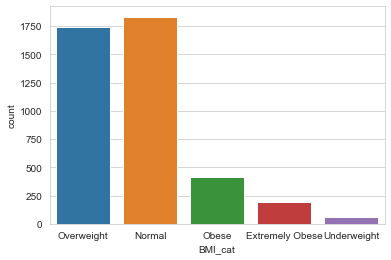

In [148]:
sns.countplot(x= df['BMI_cat'],data=df);

### Exploring the Heart Rate

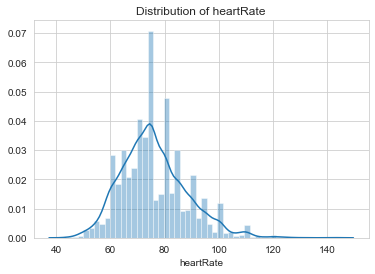

In [153]:
sns.distplot(df['heartRate'])
plt.title('Distribution of heartRate');

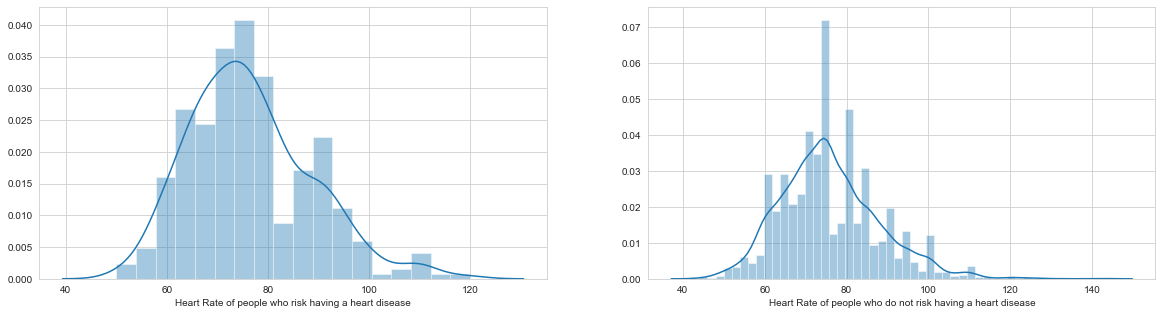

In [155]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,5))
ax = sns.distplot(df[df['TenYearCHD']==1]['heartRate'], ax=axis1)
ax.set(xlabel='Heart Rate of people who risk having a heart disease')
ax = sns.distplot(df[df['TenYearCHD']==0]['heartRate'], ax=axis2)
ax.set(xlabel='Heart Rate of people who do not risk having a heart disease');

In [156]:
print('Minimum Heart Rate of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['heartRate'].min())
print('Maximum Heart Rate of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['heartRate'].max())
print('Average Heart Rate of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['heartRate'].mean())

Minimum Heart Rate of those who risk having a heart disease : 50.0
Maximum Heart Rate of those who risk having a heart disease : 120.0
Average Heart Rate of those who risk having a heart disease : 76.5303265940902


In [157]:
print('Minimum Heart Rate of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['heartRate'].min())
print('Maximum Heart Rate of those who do not  risk having a heart disease :', df[df['TenYearCHD'] == 0]['heartRate'].max())
print('Average Heart Rate of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['heartRate'].mean())

Minimum Heart Rate of those who do not risk having a heart disease : 44.0
Maximum Heart Rate of those who do not  risk having a heart disease : 143.0
Average Heart Rate of those who do not risk having a heart disease : 75.7623817473567


### Exploring Glucose levels (glucose)

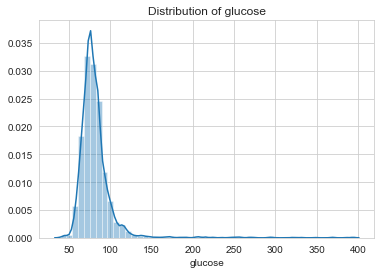

In [158]:
sns.distplot(df['glucose'])
plt.title('Distribution of glucose');

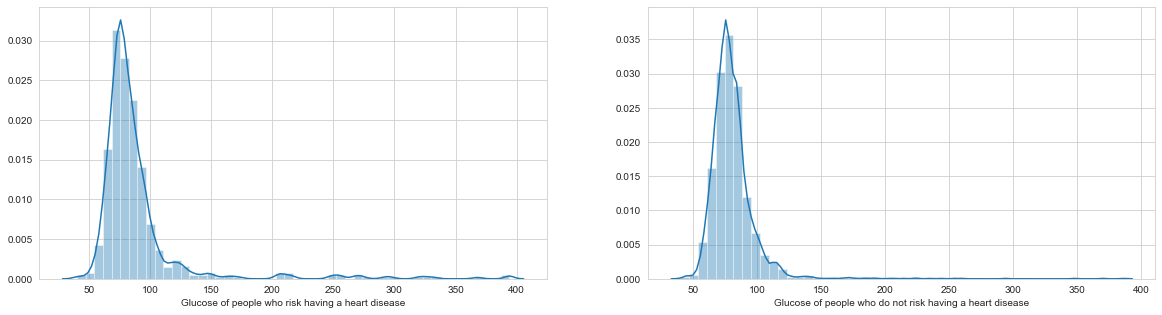

In [159]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,5))
ax = sns.distplot(df[df['TenYearCHD']==1]['glucose'], ax=axis1)
ax.set(xlabel='Glucose of people who risk having a heart disease')
ax = sns.distplot(df[df['TenYearCHD']==0]['glucose'], ax=axis2)
ax.set(xlabel='Glucose of people who do not risk having a heart disease');

In [160]:
print('Minimum Glucose of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['glucose'].min())
print('Maximum Glucose of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['glucose'].max())
print('Average Glucose of those who risk having a heart disease :', df[df['TenYearCHD'] == 1]['glucose'].mean())

Minimum Glucose of those who risk having a heart disease : 40.0
Maximum Glucose of those who risk having a heart disease : 394.0
Average Glucose of those who risk having a heart disease : 89.00841750841751


In [161]:
print('Minimum Glucose of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['glucose'].min())
print('Maximum Glucose of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['glucose'].max())
print('Average Glucose of those who do not risk having a heart disease :', df[df['TenYearCHD'] == 0]['glucose'].mean())

Minimum Glucose of those who do not risk having a heart disease : 40.0
Maximum Glucose of those who do not risk having a heart disease : 386.0
Average Glucose of those who do not risk having a heart disease : 80.6821253071253
